In [73]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn import datasets

from dbc.main import KmeansDiscreteBayesianClassifier, KmeansDiscreteMinimaxClassifier, \
    CmeansDiscreteBayesianClassifier, DecisionTreeDiscreteBayesianClassifier, DecisionTreeDiscreteMinimaxClassifier
from dbc.utils import compute_conditional_risk
import seaborn as sns
import pandas as pd

In [74]:
depth = 6
num_clusters = 2 ** depth

In [75]:
# Initialize storage for risks
results = {"Method": [], "Risk Class": [], "Risk": []}

# Repeat experiments 100 times for each classifier
for _ in range(100):
    X_train, y_train = datasets.make_blobs(n_samples=[125 * 5, 125 * 2], n_features=2, centers=[(9.5, 10), (10, 9.4)],
                                       cluster_std=[[0.6, 0.6], [0.35, 0.3]], shuffle=True)
    for name, clf in [
        ("KMeans Bayesian", KmeansDiscreteBayesianClassifier(n_clusters=num_clusters)),
        ("KMeans Minimax", KmeansDiscreteMinimaxClassifier(n_clusters=num_clusters)),
        ("DecisionTree Bayesian", DecisionTreeDiscreteBayesianClassifier(max_depth=depth)),
        ("DecisionTree Minimax", DecisionTreeDiscreteMinimaxClassifier(max_depth=depth))
    ]:
        clf.fit(X_train, y_train)
        if "Bayesian" in name and isinstance(clf, DecisionTreeDiscreteBayesianClassifier):
            y_pred = clf.predict(X_train, prior_pred=clf.prior)
        else:
            y_pred = clf.predict(X_train)

        # Compute the conditional risk (now a 1x2 array)
        risks, _ = compute_conditional_risk(y_train, y_pred)

        # Append both dimensions of the risk to results
        results["Method"].extend([name, name])  # Repeated for both dimensions
        results["Risk Class"].extend(["Class 1", "Class 2"])  # Label both dimensions
        results["Risk"].extend(risks)  # Extend with both risk values

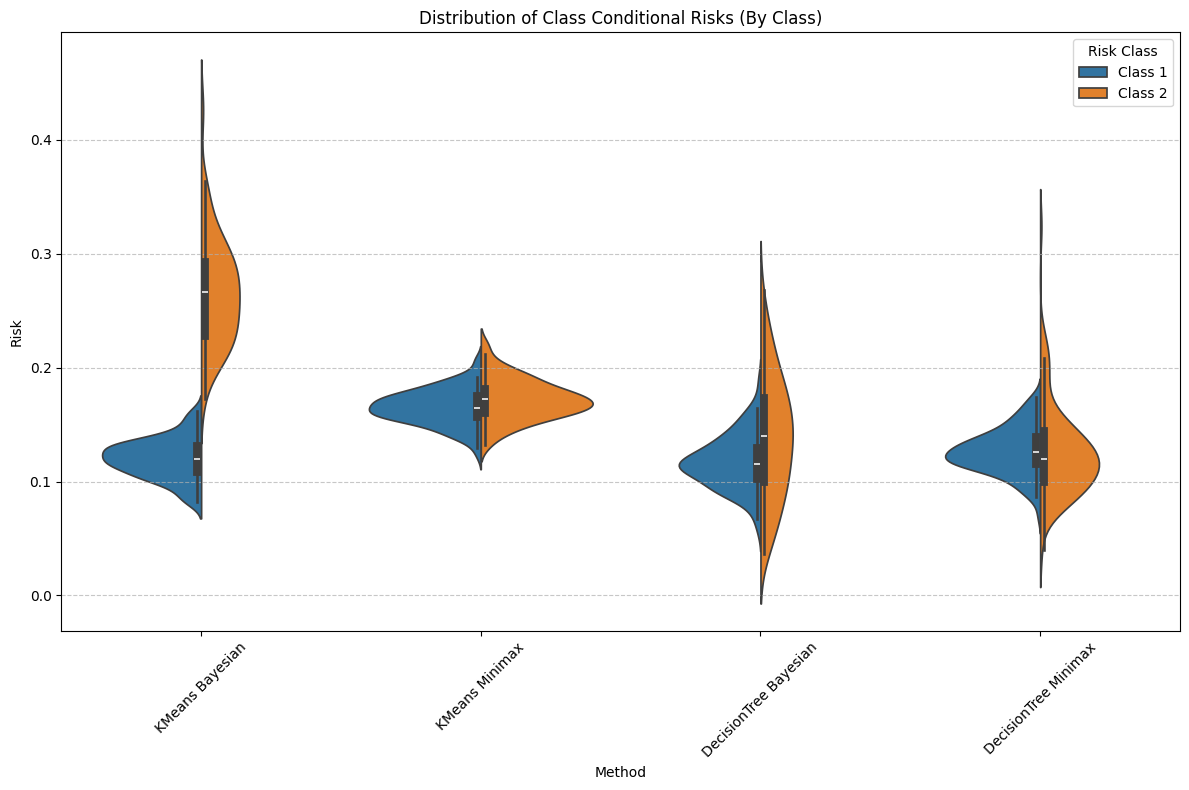

In [76]:
results_df = pd.DataFrame(results)

# Plot the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x="Method", y="Risk", hue="Risk Class", data=results_df, split=True, inner="box")

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title("Distribution of Class Conditional Risks (By Class)")
plt.ylabel("Risk")
plt.xlabel("Method")
plt.xticks(rotation=45)
plt.legend(title="Risk Class")
plt.tight_layout()
plt.show()